### Amsterdam’s Airbnb Market in 2018
Data Exploration


In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

### Store CSV into DataFrame

In [5]:
# Read in the calendar data set
df_calendar = pd.read_csv('./Data/calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,2818,2019-12-05,f,NaN
1,73208,2019-08-30,f,NaN
2,73208,2019-08-29,f,NaN
3,73208,2019-08-28,f,NaN
4,73208,2019-08-27,f,NaN


In [4]:
df_calendar.count()

listing_id    7310950
date          7310950
available     7310950
price         1200071
dtype: int64

In [11]:
# Remove missing values
df_calendar.dropna(how='any')

,listing_id,date,available,price
240,255809,2019-12-05,t,$150.00
241,255809,2019-12-04,t,$150.00
242,255809,2019-12-03,t,$150.00
243,255809,2019-12-02,t,$150.00
244,255809,2019-12-01,t,$150.00
...,...,...,...,...
7310945,29979667,2018-12-11,t,$139.00
7310946,29979667,2018-12-10,t,$139.00
7310947,29979667,2018-12-09,t,$139.00
7310948,29979667,2018-12-08,t,$139.00


In [7]:
# Read in the listings data set
df_listings = pd.read_csv('./Data/listings_details.csv')
df_listings.head()

C:\Users\User 1\anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20181206172549,2018-12-06,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,3209,https://www.airbnb.com/rooms/3209,20181206172549,2018-12-06,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.03
2,20168,https://www.airbnb.com/rooms/20168,20181206172549,2018-12-06,100%Centre-Studio 1 Private Floor/Bathroom,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.18
3,25428,https://www.airbnb.com/rooms/25428,20181206172549,2018-12-06,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.09
4,27886,https://www.airbnb.com/rooms/27886,20181206172549,2018-12-06,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.03


In [10]:
df_listings.count()

id                                  20030
listing_url                         20030
scrape_id                           20030
last_scraped                        20030
name                                19992
                                    ...  
cancellation_policy                 20030
require_guest_profile_picture       20030
require_guest_phone_verification    20030
calculated_host_listings_count      20030
reviews_per_month                   17624
Length: 96, dtype: int64

In [12]:
df_listings.dropna(how='any')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month


In [8]:
# Read in the reviews data set
df_reviews = pd.read_csv('./Data/reviews_details.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [9]:
df_reviews.count()

listing_id       431830
id               431830
date             431830
reviewer_id      431830
reviewer_name    431830
comments         431300
dtype: int64

In [13]:
df_reviews.dropna(how='any')

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...
...,...,...,...,...,...,...
431825,30435529,355474875,2018-12-04,131376847,Andy,The host canceled this reservation the day bef...
431826,30439111,355041813,2018-12-02,103201416,Mohammed,The host canceled this reservation 20 days bef...
431827,30518120,355519016,2018-12-04,228738702,Valeriya,The host canceled this reservation 22 days bef...
431828,30525429,355658538,2018-12-05,111439550,Lucas,I loved this house! It is truly incredible and...


### Property type

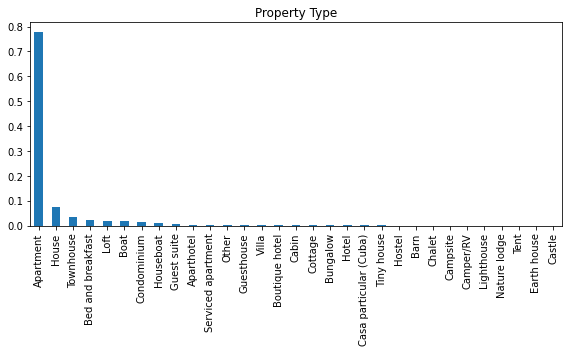

In [35]:
# Explore Categorical Feature - property_type
prop_vals = df_listings['property_type'].value_counts()
(prop_vals/df_listings.shape[0]).plot(kind="bar",figsize=(8,5));
plt.title("Property Type");

#Print
plt.savefig("./Images/Av_propertyT_Fig.03.png", bbox_inches = "tight")
plt.tight_layout()

### Average price by month 

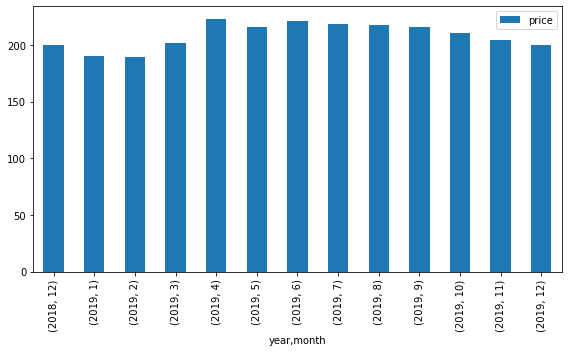

In [33]:
# Plot the average price by month 
df_calendar['year'] = pd.DatetimeIndex(df_calendar['date']).year
df_calendar['month'] = pd.DatetimeIndex(df_calendar['date']).month

# In order to average price, we will be converting it to float and removing the $ sign
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

df_calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar",figsize=(8,5));

#Print
plt.savefig("./Images/Av_priceMth_Fig.02.png", bbox_inches = "tight")
plt.tight_layout()

### Average price by month 

                                             price
neighbourhood_cleansed                            
Centrum-West                            189.920034
Centrum-Oost                            189.376301
Zuid                                    171.126995
IJburg - Zeeburgereiland                165.157080
Oud-Noord                               157.684764
De Pijp - Rivierenbuurt                 157.178500
Buitenveldert - Zuidas                  153.087786
De Baarsjes - Oud-West                  143.849218
Oud-Oost                                143.398596
Westerpark                              141.004027
Watergraafsmeer                         137.514493
Oostelijk Havengebied - Indische Buurt  126.089677
Geuzenveld - Slotermeer                 125.735849
De Aker - Nieuw Sloten                  124.711268
Noord-West                              120.171875
Noord-Oost                              118.638132
Bos en Lommer                           116.996507
Slotervaart                    

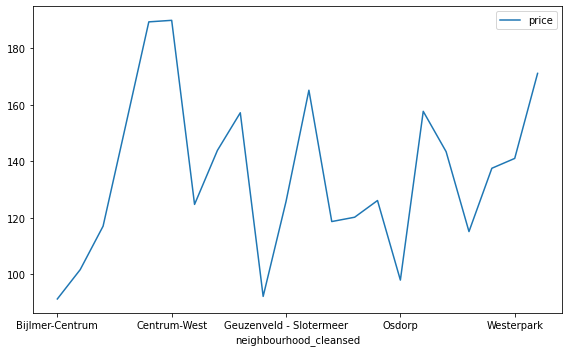

In [32]:
# Plot the average price by neighborhood

# In order to average price, we will be converting it to float and removing the $ sign
df_listings['price'] = df_listings['price'].replace('[\$,]', '', regex=True).astype(float)

print(df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False))
df_listings.groupby(['neighbourhood_cleansed'])[['price']].mean().plot(figsize=(8,5));

#Print
plt.savefig("./Images/Av_priceNbh_Fig.01.png", bbox_inches = "tight")
plt.tight_layout()

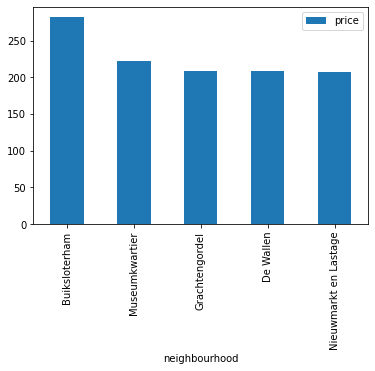

In [37]:
# Plot top 10 neighborhoods
top10_neigh = df_listings.groupby(['neighbourhood'])[['price']].mean().sort_values(by='price',ascending=False).head()
top10_neigh.plot(kind='bar');